In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import scipy.optimize as spo

## Minimizer finds coefficients in Python 2 - Polynomial

In [99]:
def error_poly(C_poly,data_poly):
    err_poly = np.sum( (data_poly[:,1] - np.polyval(C_poly, data_poly[:,0]) ) **2 )
    return err_poly

In [121]:
def fit_poly(data, error_func):
    # Generate initial geuss for poly model 
    Cgeuss = np.poly1d(np.ones(5, dtype = np.float32))
    print(Cgeuss)
    
    # Plot initial geuss
    x = np.linspace(-5,5,21)
    plt.plot(x, np.polyval(Cgeuss,x), 'm--', label='Initial geuss')
    
    # Call optimizer
    result = spo.minimize(error_func, Cgeuss, args=(data,), method='SLSQP', options={'disp':True})
    return np.poly1d(result.x)

In [124]:
def test_run_poly():
    # Define original line
    l_orig = np.float32([1.5, -10, -5, 60, 50])
    x_orig = np.linspace(-10,10,21)
    y_orig = np.polyval(l_orig, x_orig)
    plt.plot(x_orig, y_orig,'b', linewidth=2.0, label = "Original Line")
    
    # Generate noisy data
    noise_sigma = 1000.0
    noise = np.random.normal(0, noise_sigma, y_orig.shape)
    data = np.asarray([x_orig, y_orig+noise]).T
    plt.plot(data[:,0], data[:,1],'go', label="Noisy Data Points")
    
    # Try to fit a line to this data
    l_fit = fit_poly(data,error_poly)
    print(l_fit)
    plt.plot(data[:,0], np.polyval(l_fit,x_orig),'r', label="Fitted Line")
    plt.legend()
    

   4     3     2
1 x + 1 x + 1 x + 1 x + 1
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 14570312.525246512
            Iterations: 9
            Function evaluations: 99
            Gradient evaluations: 9
       4         3         2
1.526 x - 8.344 x - 7.509 x - 59.75 x - 11.15


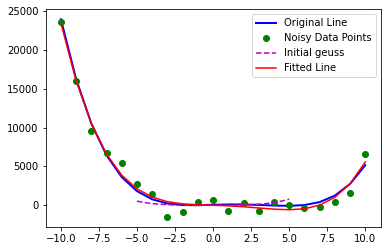

In [125]:
test_run_poly()

## Minimizer finds coefficients in Python 1

In [2]:
def error(line,data):
    #print(data)
    err = np.sum( (data[:,1] - (line[0]*data[:,0] + line[1]) ) **2 )
    return err

In [103]:
def test_run():
    # Define original line
    l_orig = np.float32([4,2])
    x_orig = np.linspace(0,10,21)
    y_orig = l_orig[0]*x_orig + l_orig[1]
    plt.plot(x_orig, y_orig,'b', linewidth=2.0, label = "Original Line")
    
    # Generate noisy data
    noise_sigma = 3.0
    noise = np.random.normal(0, noise_sigma, y_orig.shape)
    data = np.asarray([x_orig, y_orig+noise]).T
    #plt.plot(data[:,0], data[:,1],'go',label="Noisy Data Points")
    plt.plot(data[:,0], data[:,1],label="Noisy Data Points")
    
    # Try to fit a line to this data
    l_fit = fit_line(data,error)
    print("Fitted line: C0 = {}, C1 = {}".format(l_fit[0],l_fit[1]))
    plt.plot(data[:,0], l_fit[0]*data[:,0] + l_fit[1], label="Fitted Line")
    plt.legend()

In [106]:
def fit_line(data,error_func):
    # Generate initial guess for line model
    l = np.float32([0, np.mean(data[:,1])])
    
    # PLot initial guess
    x_ends = np.float32([0,5])
    plt.plot(x_ends, l[0]*x_ends + l[1], label='Initial Geuss')
    
    # Call optimizer
    result = spo.minimize(error_func, l, args=(data,), method='SLSQP',options={'disp':True})
    return result.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 216.93189639413336
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line: C0 = 4.054760365670096, C1 = 1.5791815887471898


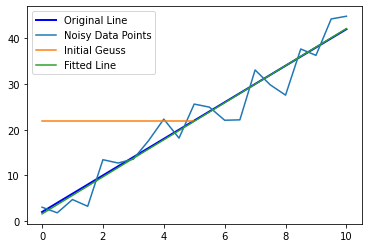

In [108]:
test_run()

## Optimizer - Minimizer

In [8]:
def f(X):
    Y = (X - 1.5)**2 + 0.5
    print("X = {}, Y = {}".format(X,Y))
    return Y

In [9]:
def test_run():
    Xgeuss = 2.0
    min_result = spo.minimize(f, Xgeuss, method='SLSQP', options={'disp':True})
    print("Minima found at:")
    print("X = {}, Y = {}".format(min_result.x, min_result.fun))

In [11]:
test_run()

X = [2.], Y = [0.75]
X = [2.], Y = [0.75]
X = [2.00000001], Y = [0.75000001]
X = [0.99999999], Y = [0.75000001]
X = [1.5], Y = [0.5]
X = [1.5], Y = [0.5]
X = [1.50000001], Y = [0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X = [1.5], Y = 0.5
